<a href="https://colab.research.google.com/github/sr030529/heartattack/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [55]:
!pip install pycaret==2.3.6


  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Import Libraries**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [98]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sr030529/HEARTATTACK-/main/heart%20rish%20.csv')
df.head(25)

Age  Sex  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
0     9    0         1          1   40       1       0         0   
1     7    0         0          0   25       1       0         0   
2     9    0         1          1   28       0       0         0   
3    11    0         0          1   27       0       0         0   
4    11    0         1          1   24       0       0         0   
5    10    1         1          1   25       1       0         0   
6     9    0         0          1   30       1       0         0   
7    11    0         1          1   25       1       0         0   
8     9    0         1          1   30       1       0         2   
9     8    1         0          1   24       0       0         0   
10   13    1         0          1   25       1       0         2   
11   10    0         1          1   34       1       0         0   
12    7    0         0          1   26       1       0         0   
13   11    0         1          1   28       0       0         2   
14    4    0         1          1   33       1       1         0   
15    6    0         0          1   33       0       0         0   
16   10    0         1          1   21       0       0         0   
17    7    1         0          1   23       1       0         2   
18    2    0         0          0   23       0       0         0   
19    4    1         1          1   28       0       0         0   
20   12    0         1          1   22       0       1         0   
21   13    0         1          1   38       1       0         0   
22    5    1         0          1   28       1       0         0   
23   13    0         0          1   27       0       0         2   
24    9    0         1          1   28       1       0         0   

    PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0              0       0        1                  0              1   
1              1       0        0                  0              0   
2              0       1        0                  0              1   
3              1       1        1                  0              1   
4              1       1        1                  0              1   
5              1       1        1                  0              1   
6              0       0        0                  0              1   
7              1       0        1                  0              1   
8              0       1        1                  0              1   
9              0       0        1                  0              1   
10             1       1        1                  0              1   
11             0       1        1                  0              1   
12             0       0        1                  0              1   
13             0       0        1                  0              1   
14             1       0        1                  0              1   
15             1       0        0                  0              1   
16             1       1        1                  0              1   
17             1       0        0                  0              1   
18             0       0        1                  0              1   
19             0       0        0                  1              1   
20             0       1        0                  0              1   
21             0       1        1                  0              1   
22             0       0        1                  0              1   
23             1       1        1                  0              1   
24             0       1        1                  0              1   

    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  HighBP  \
0             0        5        18        15         1       1   
1             1        3         0         0         0       0   
2             1        5        30        30         1       1   
3             0        2         0         0         0       1   
4             0        2         3         0         0    

In [99]:
len(df.index)

499

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   499 non-null    int64
 1   Sex                   499 non-null    int64
 2   HighChol              499 non-null    int64
 3   CholCheck             499 non-null    int64
 4   BMI                   499 non-null    int64
 5   Smoker                499 non-null    int64
 6   Stroke                499 non-null    int64
 7   Diabetes              499 non-null    int64
 8   PhysActivity          499 non-null    int64
 9   Fruits                499 non-null    int64
 10  Veggies               499 non-null    int64
 11  HvyAlcoholConsump     499 non-null    int64
 12  AnyHealthcare         499 non-null    int64
 13  NoDocbcCost           499 non-null    int64
 14  GenHlth               499 non-null    int64
 15  MentHlth              499 non-null    int64
 16  PhysHlth

In [101]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [102]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

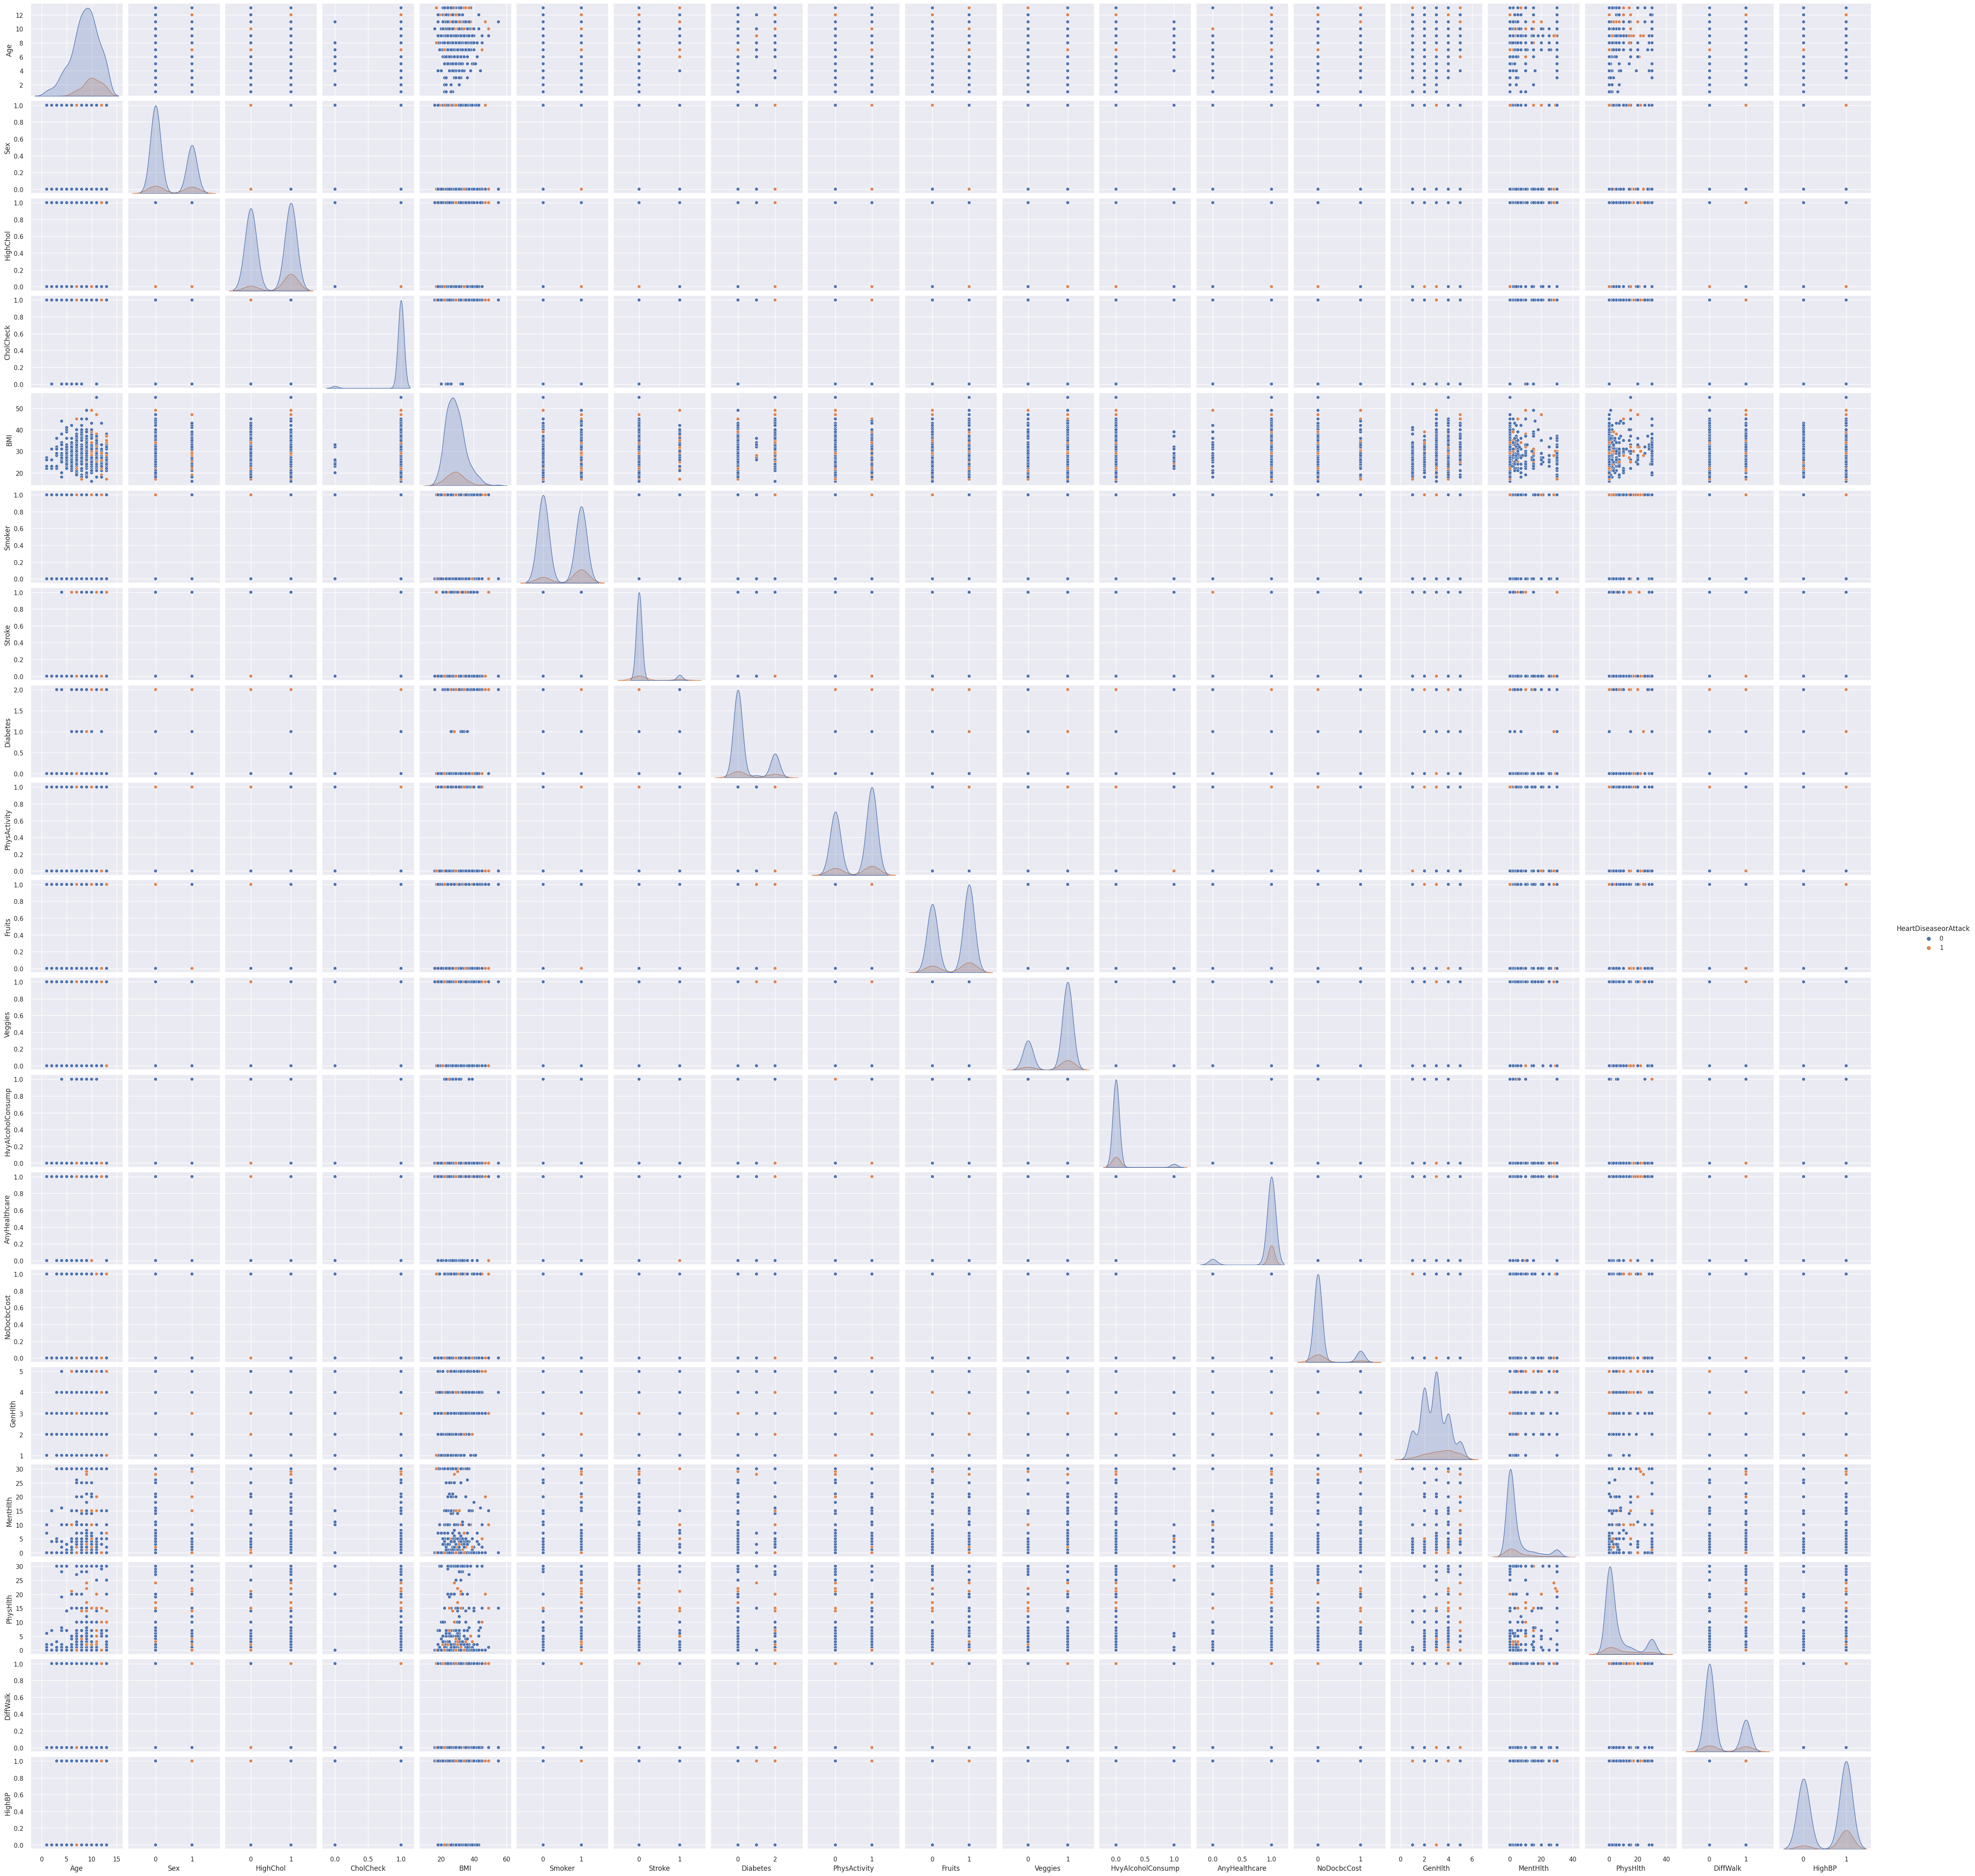

In [104]:
sns.pairplot(df, hue='HeartDiseaseorAttack')
plt.show()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   499 non-null    int64
 1   Sex                   499 non-null    int64
 2   HighChol              499 non-null    int64
 3   CholCheck             499 non-null    int64
 4   BMI                   499 non-null    int64
 5   Smoker                499 non-null    int64
 6   Stroke                499 non-null    int64
 7   Diabetes              499 non-null    int64
 8   PhysActivity          499 non-null    int64
 9   Fruits                499 non-null    int64
 10  Veggies               499 non-null    int64
 11  HvyAlcoholConsump     499 non-null    int64
 12  AnyHealthcare         499 non-null    int64
 13  NoDocbcCost           499 non-null    int64
 14  GenHlth               499 non-null    int64
 15  MentHlth              499 non-null    int64
 16  PhysHlth

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   499 non-null    int64
 1   Sex                   499 non-null    int64
 2   HighChol              499 non-null    int64
 3   CholCheck             499 non-null    int64
 4   BMI                   499 non-null    int64
 5   Smoker                499 non-null    int64
 6   Stroke                499 non-null    int64
 7   Diabetes              499 non-null    int64
 8   PhysActivity          499 non-null    int64
 9   Fruits                499 non-null    int64
 10  Veggies               499 non-null    int64
 11  HvyAlcoholConsump     499 non-null    int64
 12  AnyHealthcare         499 non-null    int64
 13  NoDocbcCost           499 non-null    int64
 14  GenHlth               499 non-null    int64
 15  MentHlth              499 non-null    int64
 16  PhysHlth

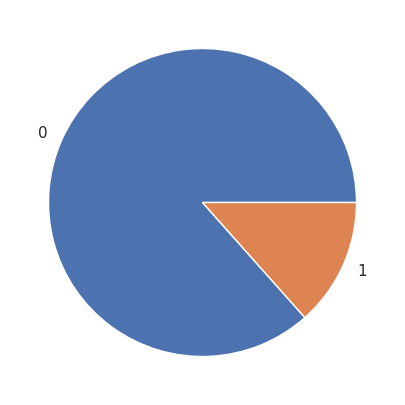

In [107]:
y =df['HeartDiseaseorAttack']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [108]:
X = df.drop(columns=['HeartDiseaseorAttack'])
X.head(10)

Age  Sex  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0    9    0         1          1   40       1       0         0             0   
1    7    0         0          0   25       1       0         0             1   
2    9    0         1          1   28       0       0         0             0   
3   11    0         0          1   27       0       0         0             1   
4   11    0         1          1   24       0       0         0             1   
5   10    1         1          1   25       1       0         0             1   
6    9    0         0          1   30       1       0         0             0   
7   11    0         1          1   25       1       0         0             1   
8    9    0         1          1   30       1       0         2             0   
9    8    1         0          1   24       0       0         0             0   

   Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0        1                  0              1            0        5   
1       0        0                  0              0            1        3   
2       1        0                  0              1            1        5   
3       1        1                  0              1            0        2   
4       1        1                  0              1            0        2   
5       1        1                  0              1            0        2   
6       0        0                  0              1            0        3   
7       0        1                  0              1            0        3   
8       1        1                  0              1            0        5   
9       0        1                  0              1            0        2   

   MentHlth  PhysHlth  DiffWalk  HighBP  
0        18        15         1       1  
1         0         0         0       0  
2        30        30         1       1  
3         0         0         0       1  
4         3         0         0       1  
5         0         2         0       1  
6         0        14         0       1  
7         0         0         1       1  
8        30        30         1       1  
9         0         0         0       0

In [109]:
X.describe().transpose()

count       mean        std   min   25%   50%   75%   max
Age                499.0   8.865731   2.631293   1.0   7.0   9.0  11.0  13.0
Sex                499.0   0.368737   0.482947   0.0   0.0   0.0   1.0   1.0
HighChol           499.0   0.551102   0.497881   0.0   0.0   1.0   1.0   1.0
CholCheck          499.0   0.979960   0.140278   0.0   1.0   1.0   1.0   1.0
BMI                499.0  28.821643   5.940320  16.0  24.0  28.0  32.0  55.0
Smoker             499.0   0.496994   0.500493   0.0   0.0   0.0   1.0   1.0
Stroke             499.0   0.078156   0.268687   0.0   0.0   0.0   0.0   1.0
Diabetes           499.0   0.484970   0.846250   0.0   0.0   0.0   1.0   2.0
PhysActivity       499.0   0.579158   0.494190   0.0   0.0   1.0   1.0   1.0
Fruits             499.0   0.567134   0.495970   0.0   0.0   1.0   1.0   1.0
Veggies            499.0   0.751503   0.432575   0.0   1.0   1.0   1.0   1.0
HvyAlcoholConsump  499.0   0.036072   0.186657   0.0   0.0   0.0   0.0   1.0
AnyHealthcare      499.0   0.945892   0.226458   0.0   1.0   1.0   1.0   1.0
NoDocbcCost        499.0   0.120240   0.325569   0.0   0.0   0.0   0.0   1.0
GenHlth            499.0   2.891784   1.112323   1.0   2.0   3.0   4.0   5.0
MentHlth           499.0   4.314629   8.359590   0.0   0.0   0.0   4.0  30.0
PhysHlth           499.0   6.194389  10.189189   0.0   0.0   0.0   7.0  30.0
DiffWalk           499.0   0.292585   0.455406   0.0   0.0   0.0   1.0   1.0
HighBP             499.0   0.593186   0.491733   0.0   0.0   1.0   1.0   1.0

**Standardize the Data**

In [110]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Age       Sex  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  0.051079 -0.764282  0.902522   0.143003  1.883665  1.006030 -0.291175   
1 -0.709767 -0.764282 -1.108007  -6.992853 -0.643985  1.006030 -0.291175   
2  0.051079 -0.764282  0.902522   0.143003 -0.138455 -0.994006 -0.291175   
3  0.811924 -0.764282 -1.108007   0.143003 -0.306965 -0.994006 -0.291175   
4  0.811924 -0.764282  0.902522   0.143003 -0.812495 -0.994006 -0.291175   
5  0.431501  1.308418  0.902522   0.143003 -0.643985  1.006030 -0.291175   
6  0.051079 -0.764282 -1.108007   0.143003  0.198565  1.006030 -0.291175   
7  0.811924 -0.764282  0.902522   0.143003 -0.643985  1.006030 -0.291175   
8  0.051079 -0.764282  0.902522   0.143003  0.198565  1.006030 -0.291175   
9 -0.329344  1.308418 -1.108007   0.143003 -0.812495 -0.994006 -0.291175   

   Diabetes  PhysActivity    Fruits   Veggies  HvyAlcoholConsump  \
0 -0.573656     -1.173111 -1.144633  0.575036          -0.193448   
1 -0.573656      0.852434 -1.144633 -1.739021          -0.193448   
2 -0.573656     -1.173111  0.873642 -1.739021          -0.193448   
3 -0.573656      0.852434  0.873642  0.575036          -0.193448   
4 -0.573656      0.852434  0.873642  0.575036          -0.193448   
5 -0.573656      0.852434  0.873642  0.575036          -0.193448   
6 -0.573656     -1.173111 -1.144633 -1.739021          -0.193448   
7 -0.573656      0.852434 -1.144633  0.575036          -0.193448   
8  1.792083     -1.173111  0.873642  0.575036          -0.193448   
9 -0.573656     -1.173111 -1.144633  0.575036          -0.193448   

   AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  \
0       0.239172    -0.369695  1.897230  1.638729  0.865078  1.554930   
1      -4.181086     2.704934  0.097386 -0.516647 -0.608547 -0.643116   
2       0.239172     2.704934  1.897230  3.075647  2.338704  1.554930   
3       0.239172    -0.369695 -0.802536 -0.516647 -0.608547 -0.643116   
4       0.239172    -0.369695 -0.802536 -0.157418 -0.608547 -0.643116   
5       0.239172    -0.369695 -0.802536 -0.516647 -0.412064 -0.643116   
6       0.239172    -0.369695  0.097386 -0.516647  0.766837 -0.643116   
7       0.239172    -0.369695  0.097386 -0.516647 -0.608547  1.554930   
8       0.239172    -0.369695  1.897230  3.075647  2.338704  1.554930   
9       0.239172    -0.369695 -0.802536 -0.516647 -0.608547 -0.643116   

     HighBP  
0  0.828137  
1 -1.207530  
2  0.828137  
3  0.828137  
4  0.828137  
5  0.828137  
6  0.828137  
7  0.828137  
8  0.828137  
9 -1.207530

In [111]:
X.describe().transpose()

count          mean       std       min       25%  \
Age                499.0 -3.292846e-16  1.001004 -2.992303 -0.709767   
Sex                499.0  7.119667e-17  1.001004 -0.764282 -0.764282   
HighChol           499.0  8.543600e-17  1.001004 -1.108007 -1.108007   
CholCheck          499.0  1.139147e-16  1.001004 -6.992853  0.143003   
BMI                499.0  1.245942e-16  1.001004 -2.160576 -0.812495   
Smoker             499.0 -2.847867e-17  1.001004 -0.994006 -0.994006   
Stroke             499.0  1.423933e-17  1.001004 -0.291175 -0.291175   
Diabetes           499.0  1.779917e-17  1.001004 -0.573656 -0.573656   
PhysActivity       499.0 -7.119667e-17  1.001004 -1.173111 -1.173111   
Fruits             499.0 -4.983767e-17  1.001004 -1.144633 -1.144633   
Veggies            499.0  9.255567e-17  1.001004 -1.739021  0.575036   
HvyAlcoholConsump  499.0 -2.847867e-17  1.001004 -0.193448 -0.193448   
AnyHealthcare      499.0  1.895611e-16  1.001004 -4.181086  0.239172   
NoDocbcCost        499.0 -3.559833e-17  1.001004 -0.369695 -0.369695   
GenHlth            499.0 -5.695733e-17  1.001004 -1.702457 -0.802536   
MentHlth           499.0 -1.245942e-17  1.001004 -0.516647 -0.516647   
PhysHlth           499.0 -5.695733e-17  1.001004 -0.608547 -0.608547   
DiffWalk           499.0 -7.831633e-17  1.001004 -0.643116 -0.643116   
HighBP             499.0 -9.611550e-17  1.001004 -1.207530 -1.207530   

                        50%       75%       max  
Age                0.051079  0.811924  1.572769  
Sex               -0.764282  1.308418  1.308418  
HighChol           0.902522  0.902522  0.902522  
CholCheck          0.143003  0.143003  0.143003  
BMI               -0.138455  0.535585  4.411316  
Smoker            -0.994006  1.006030  1.006030  
Stroke            -0.291175 -0.291175  3.434366  
Diabetes          -0.573656  0.609213  1.792083  
PhysActivity       0.852434  0.852434  0.852434  
Fruits             0.873642  0.873642  0.873642  
Veggies            0.575036  0.575036  0.575036  
HvyAlcoholConsump -0.193448 -0.193448  5.169354  
AnyHealthcare      0.239172  0.239172  0.239172  
NoDocbcCost       -0.369695 -0.369695  2.704934  
GenHlth            0.097386  0.997308  1.897230  
MentHlth          -0.516647 -0.037675  3.075647  
PhysHlth          -0.608547  0.079145  2.338704  
DiffWalk          -0.643116  1.554930  1.554930  
HighBP             0.828137  0.828137  0.828137

**Observations and variables**

In [112]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

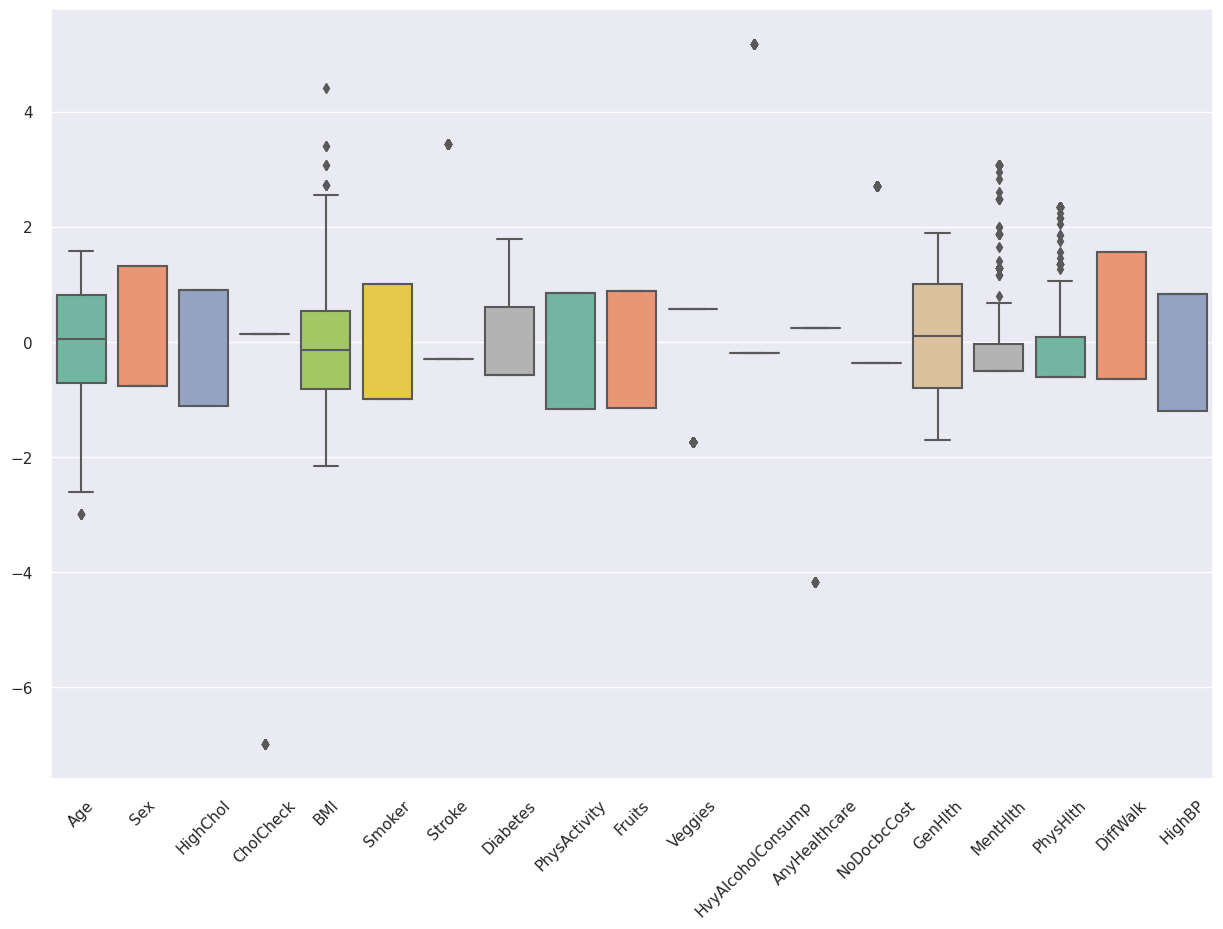

In [113]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

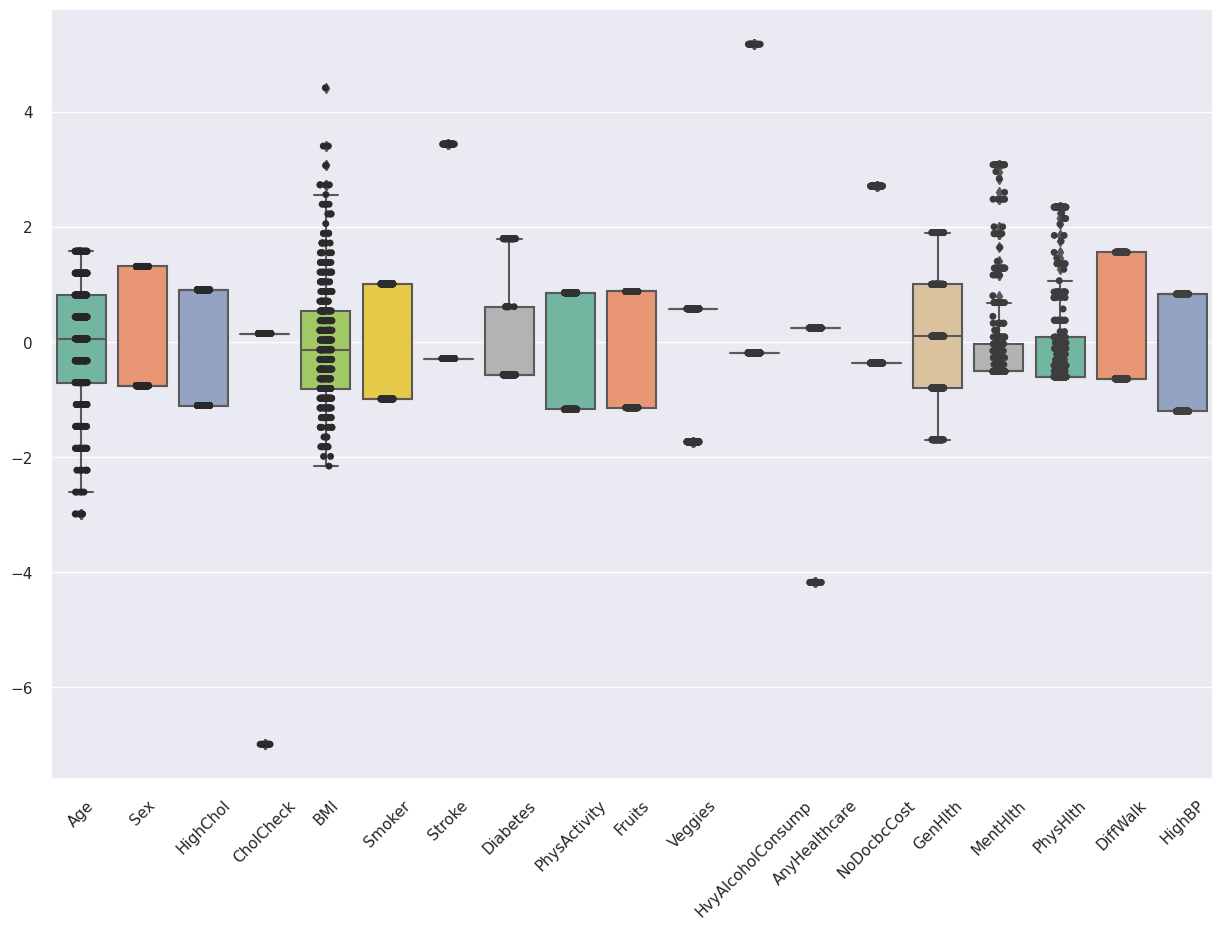

In [114]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

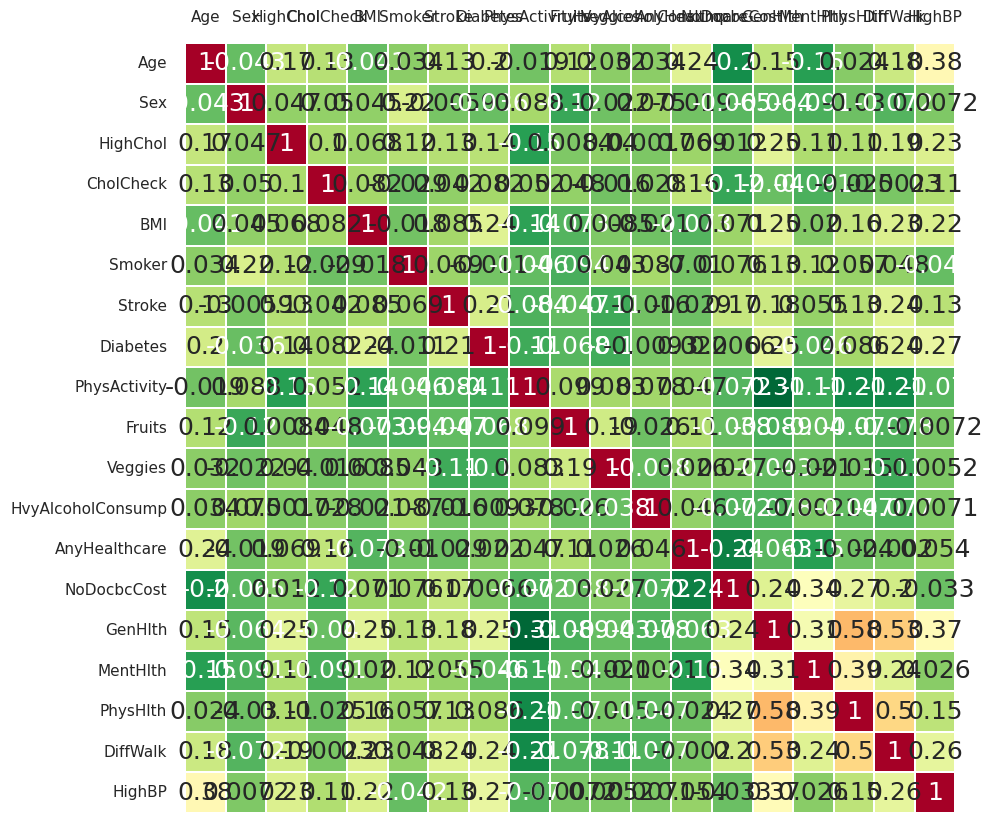

In [115]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

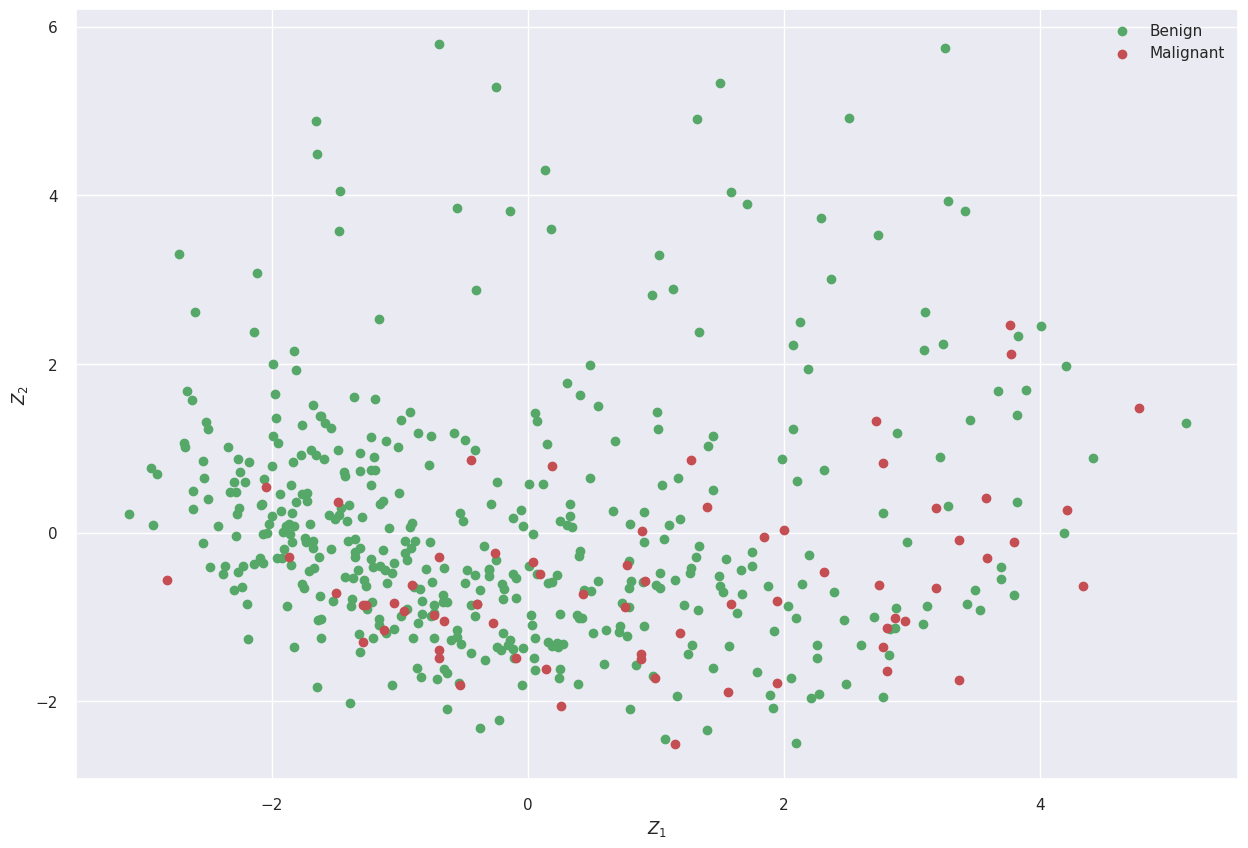

In [116]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 1.19513401e-01, -4.79947117e-01, -1.11620889e-01,
        -1.41776712e-01, -1.86949122e-01,  9.29610250e-02,
         1.49426579e-01,  2.09153897e-01, -1.82737125e-01,
         7.68837588e-02, -3.54506807e-02, -3.01356232e-01,
        -7.98272530e-02,  2.09183632e-02,  3.40957094e-02,
         1.34715707e-01,  5.52044196e-01, -3.85841969e-01,
        -4.49237828e-02],
       [-4.31561613e-02, -3.12010855e-02,  5.52574968e-01,
        -2.48800267e-01,  2.52111570e-01, -8.17656047e-02,
         1.02107119e-02, -1.13975598e-01, -3.48059151e-01,
         6.36042757e-02,  4.36657750e-01,  1.06292107e-01,
        -1.46928279e-01, -3.36322753e-01,  1.99594251e-01,
        -1.00927799e-01,  1.53069513e-01,  3.68646037e-02,
        -9.95472903e-02],
       [ 2.12418436e-01, -1.86145484e-01,  5.93369099e-02,
        -2.96225188e-01,  3.82839618e-02, -6.48903992e-02,
         2.42774035e-01, -1.77413293e-01,  4.64231425e-01,
         4.16334346e-01,  5.62730618e-02,  4.90792427e-01,
    

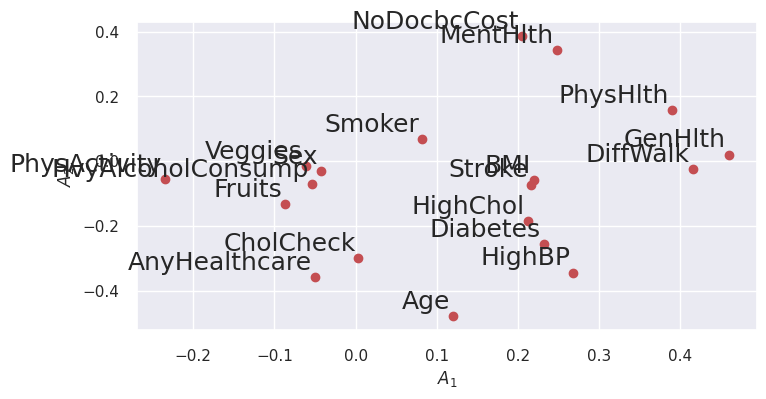

In [117]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

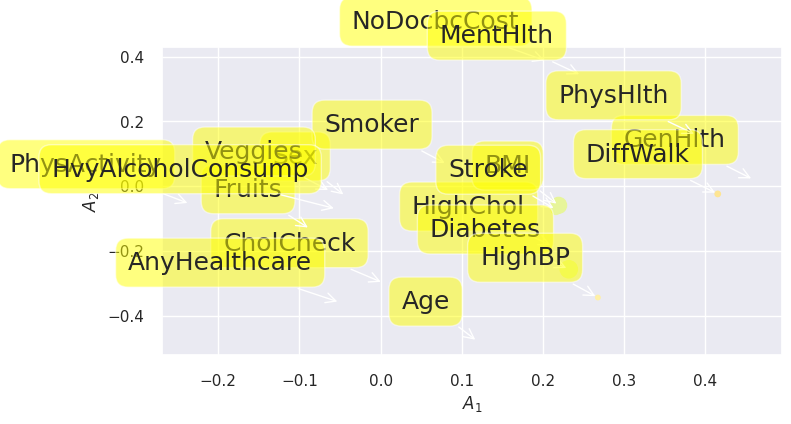

In [118]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([3.17148971, 2.01441397, 1.39064324, 1.30209148, 1.10086172,
       1.02996829, 0.99841265, 0.9540125 , 0.90073681, 0.83991472,
       0.75698505, 0.73133987, 0.7201566 , 0.64148074, 0.62254895,
       0.58406296, 0.49865729, 0.44697685, 0.33339922])

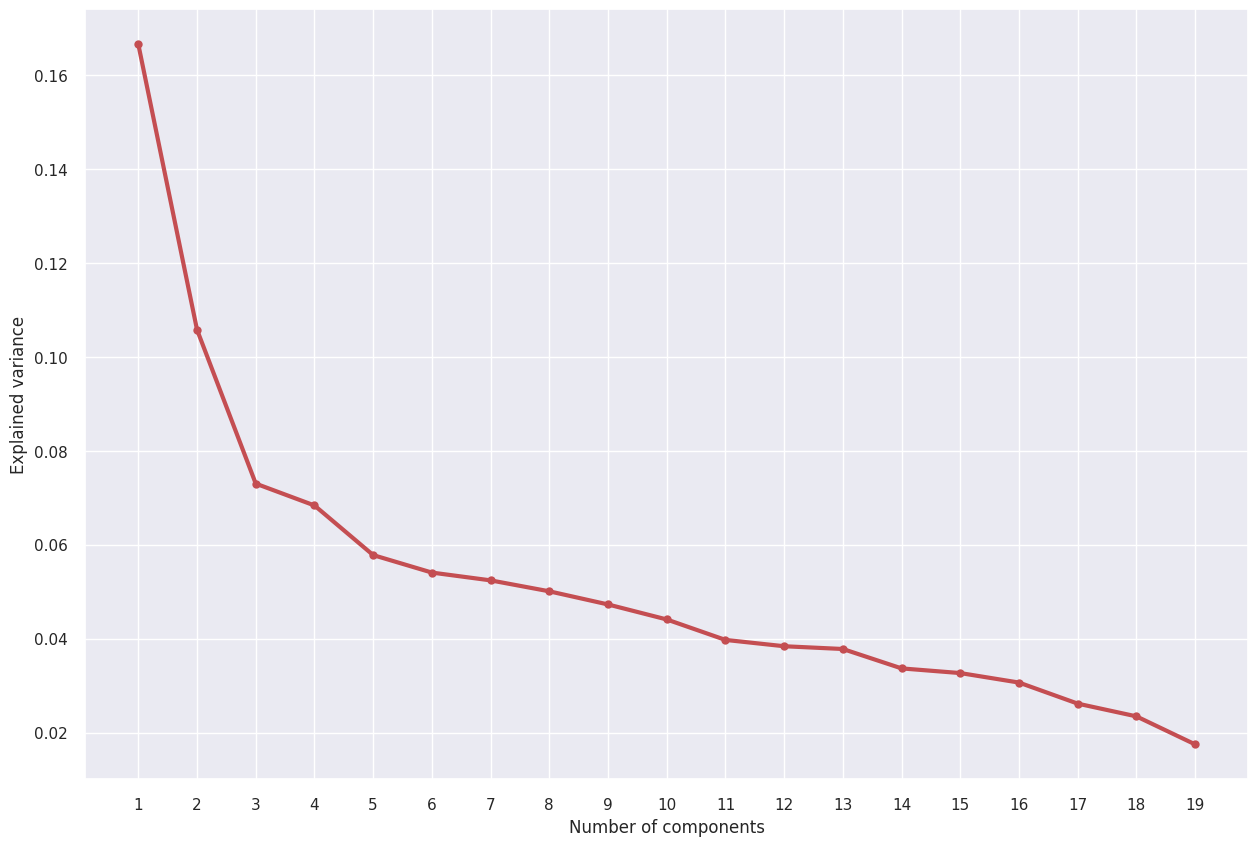

In [119]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

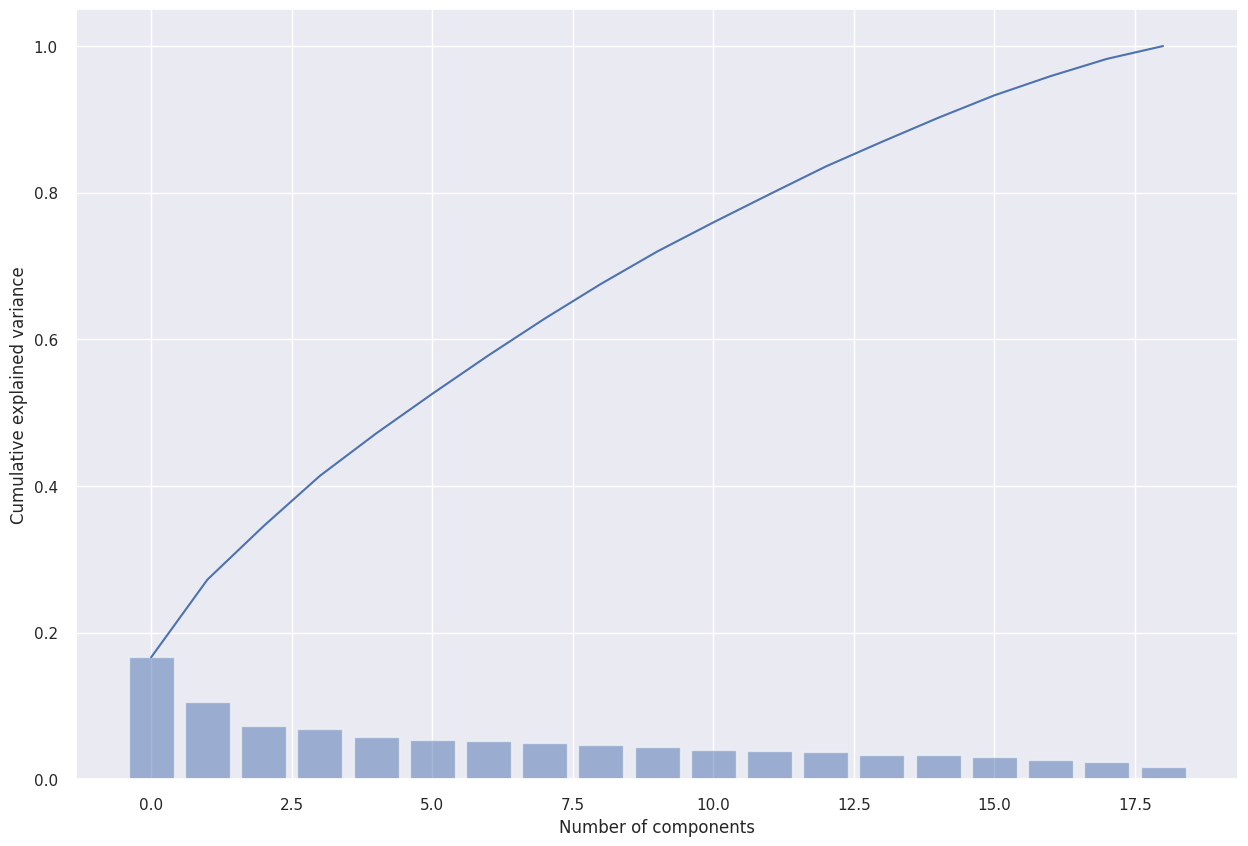

In [120]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 3.16476402e-01,  5.79109439e+00,  1.98089788e+00, -1.02738045e+00,
       -1.24869288e+00, -1.09862304e+00,  9.31714807e-02, -1.01518313e+00,
        2.64620337e-01,  5.66436142e-01, -1.19225501e+00, -6.14253653e-01,
        1.17774460e+00, -1.65773736e+00,  3.53227796e+00,  3.35141455e-01,
       -1.14110097e+00,  2.10472469e-01,  4.48699889e+00,  9.50104468e-01,
       -4.61398082e-01, -5.52178123e-01,  1.33433942e+00, -2.01839781e+00,
       -5.90235570e-01,  7.19073595e-01, -1.74780948e+00, -1.71769297e+00,
       -1.04885077e-01, -8.71618322e-01, -1.45451558e+00,  1.34799010e-01,
        6.90822106e-01, -8.09367979e-01, -1.61127107e+00, -6.52190311e-01,
       -2.70862383e-01, -3.03945932e-01,  2.61799169e+00, -3.07281919e-01,
        1.01453806e+00, -1.79638132e+00,  2.61645675e+00,  8.03567177e-01,
        5.30387030e-02,  2.87696680e+00,  2.15779959e+00, -9.76775313e-01,
       -1.59770965e-01, -1.12713498e+00,  2.76437070e-02, -9.50426079e-02,
       -8.48804899e-01,  

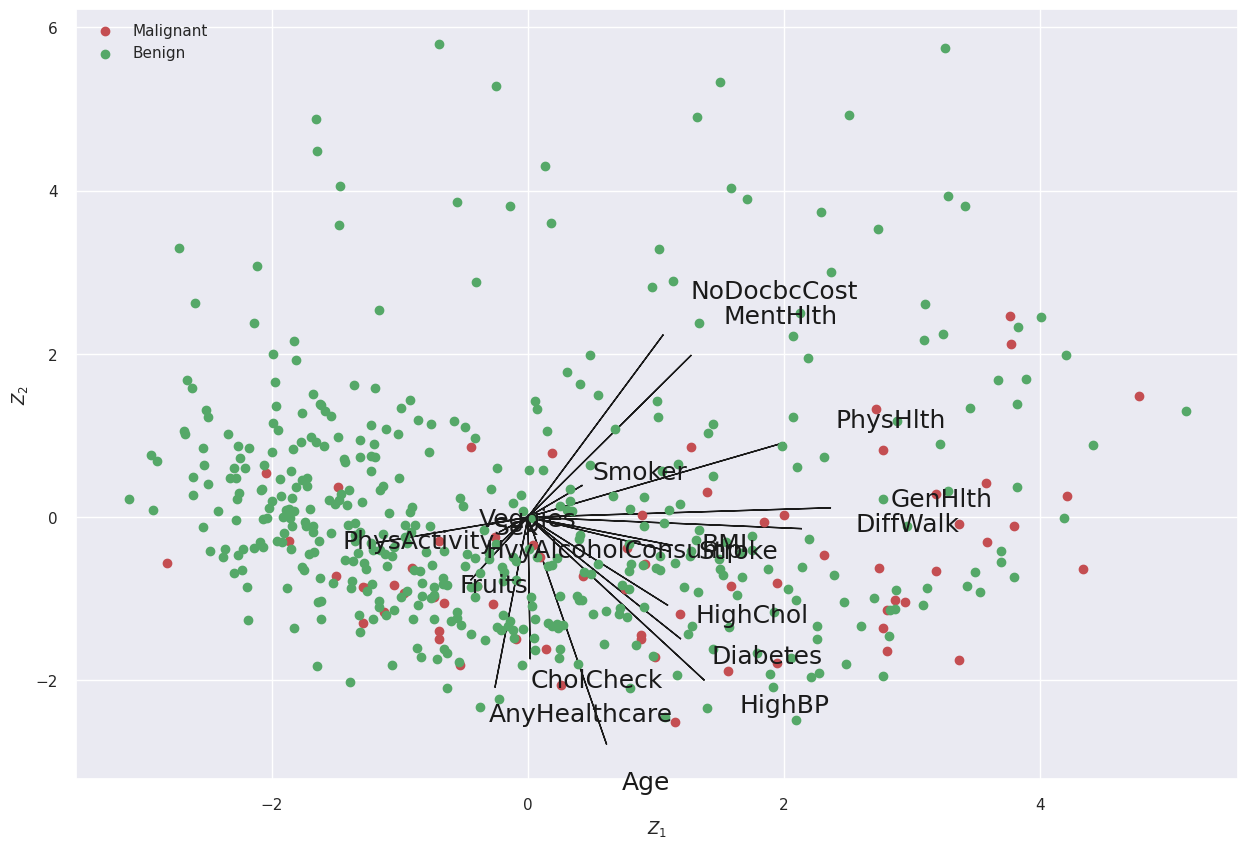

In [121]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [122]:
!pip install pca

In [123]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [19] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [17] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[17]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [124]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.277049  0.316476  0.004171 -0.679964  0.388887 -1.885500 -0.402376   
1   -0.695812  5.791094  0.874382  1.633040 -0.844234  1.519727  3.383951   
2    4.198322  1.980898 -1.907532 -0.454813 -1.502336 -0.019692 -1.595865   
3   -1.618430 -1.027380 -1.580681  0.338454  0.281569  0.485802 -0.359733   
4   -1.213227 -1.248693 -1.566484 -0.475666  0.033982  0.452288  0.151667   
..        ...       ...       ...       ...       ...       ...       ...   
494 -2.192184 -0.849786  1.153702 -0.806978 -1.060056  0.895007 -2.629651   
495  1.943970 -1.780931  1.528744 -0.333565  0.325111 -0.982327  1.329376   
496 -0.691715 -1.388938 -0.316947  0.419121  1.217124  0.756191  0.087929   
497  0.332349  0.343457  0.546532 -1.435545  0.930211 -1.423050  0.530516   
498 -0.660003 -0.819415 -0.462016  0.452408 -0.371343 -1.002472  0.816532   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    0.068094  0.476531 -0.109759 -0.919702 -0.092217 -0.172438  1.586413   
1    4.835713 -1.262422  0.791542  0.895713  0.619579  0.966463  1.021182   
2   -0.876928  0.372039  1.202840  1.178927  0.124282  0.354792  0.076317   
3    0.551671 -0.628642  0.310534 -0.102919 -0.572643 -0.388556  0.422675   
4    0.158192  0.294356  1.385303 -0.057255  0.351197 -0.239366  0.258623   
..        ...       ...       ...       ...       ...       ...       ...   
494  2.319901  2.730945 -0.230697 -1.044757  1.047040 -1.629284 -0.415519   
495  0.449702 -0.235580 -0.047421 -0.610405 -0.171363  0.389813 -1.108488   
496  0.814697 -0.259267 -1.060572 -0.702126 -0.652383  1.732586  0.361603   
497 -0.831206  0.690905 -1.055864  1.187597  0.067860  0.029870 -0.012393   
498  0.087118  1.040213  1.101783 -1.015770  0.133996 -1.313391 -0.022310   

         PC15      PC16      PC17  
0   -0.481314 -0.430227  0.342661  
1   -0.248780  1.859864 -0.026649  
2    1.565146  0.525231  0.426915  
3    0.412595 -0.134564  0.001186  
4    0.092227  0.040062  0.055905  
..        ...       ...       ...  
494 -1.000813  1.054447  1.205045  
495  0.080053  0.366734  0.631955  
496  0.314672 -0.486375 -0.171727  
497 -0.219665 -0.199572 -0.044104  
498  0.595808  0.116394  0.118878  

[499 rows x 17 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '17 Principal Components explain [98.24%] of the variance'}, xlabel='PC1 (16.6% expl.var)', ylabel='PC2 (10.5% expl.var)'>)

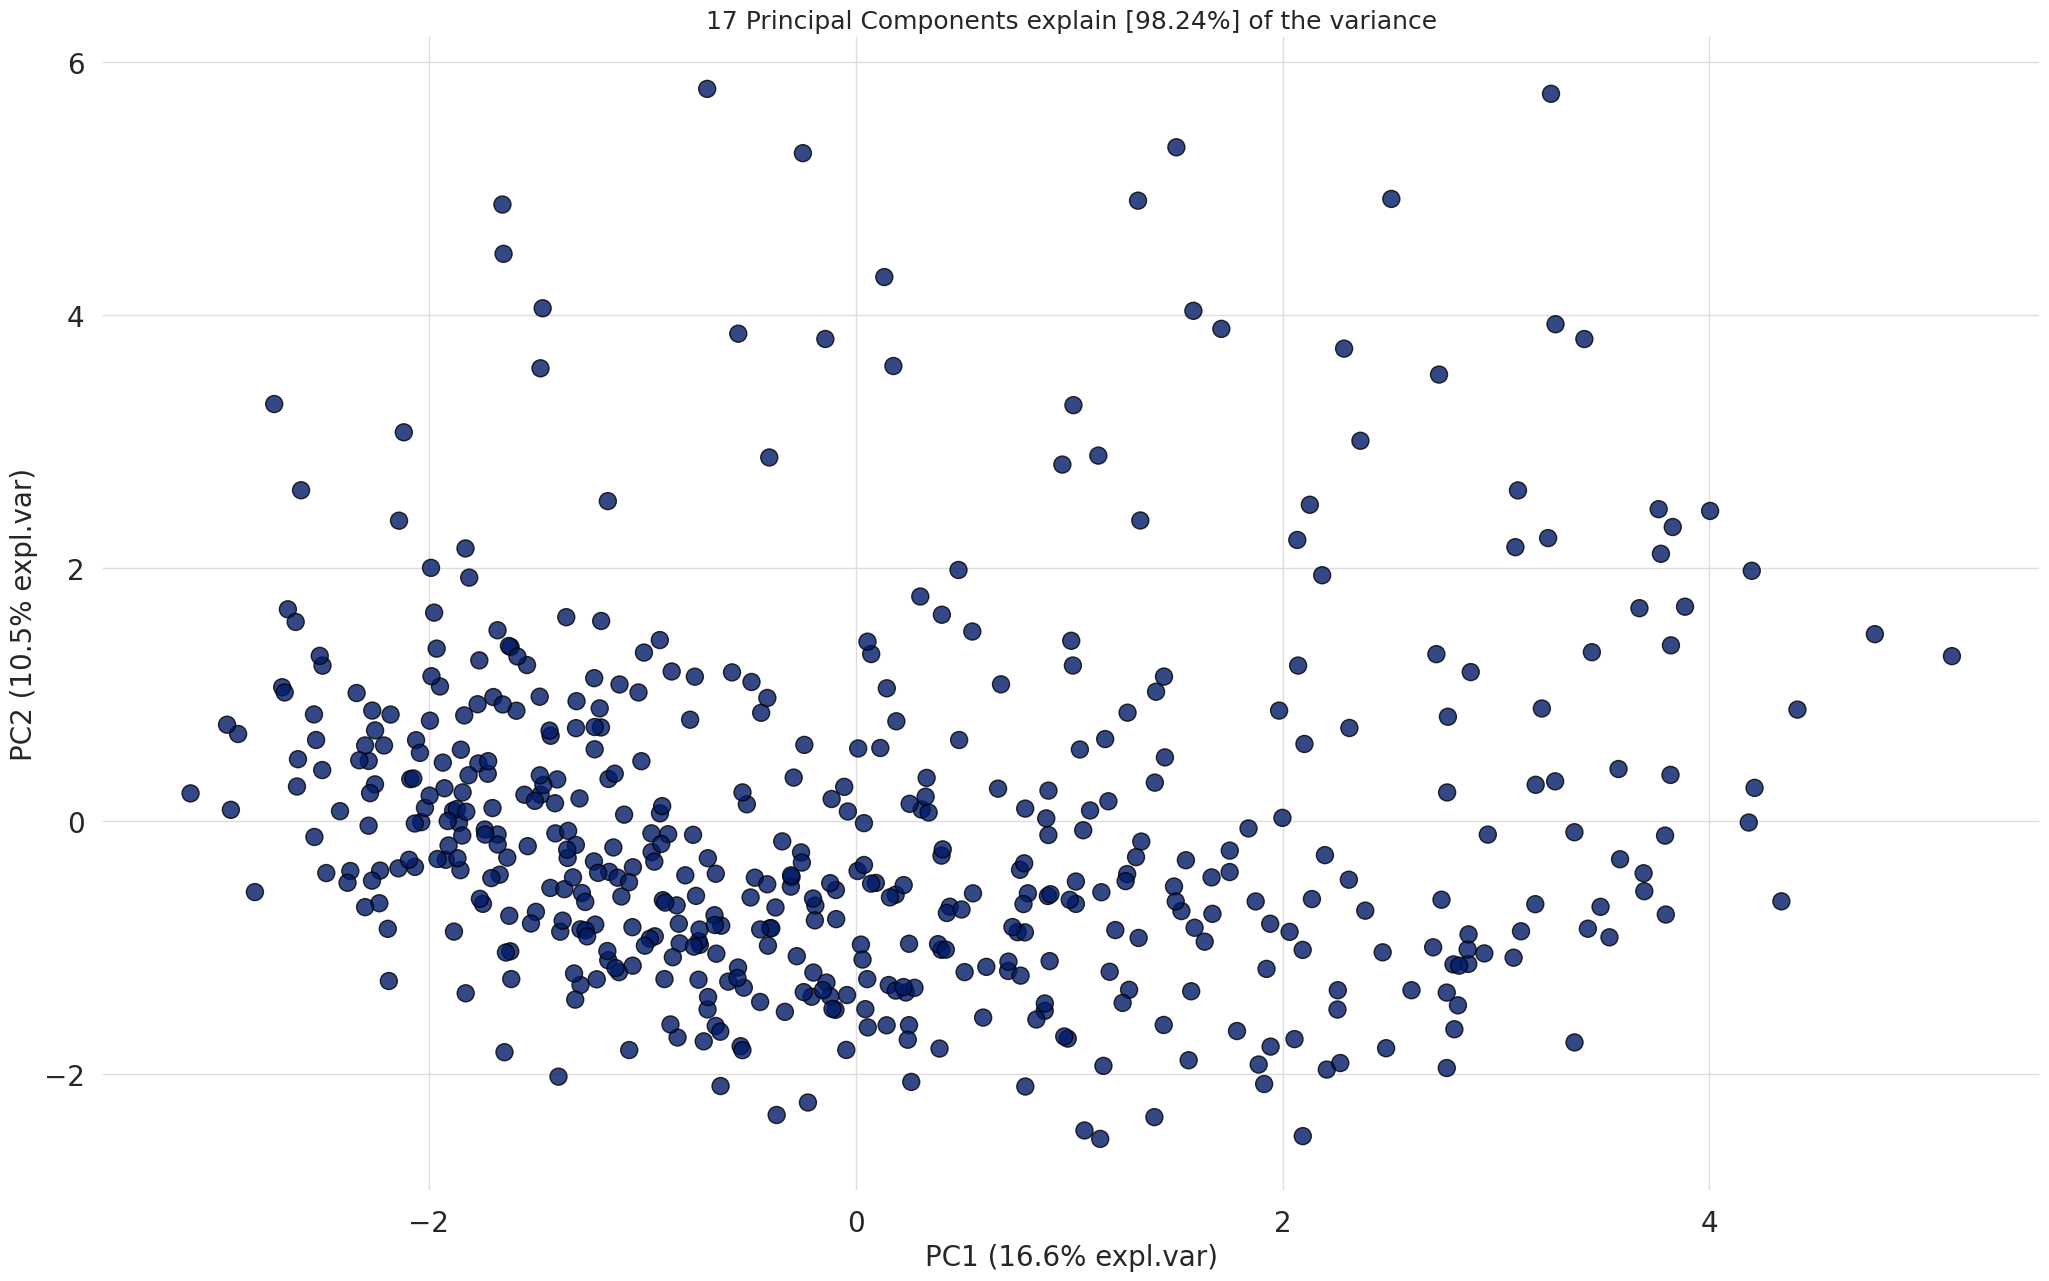

In [125]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [126]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
Age                0.119513 -0.479947 -0.111621 -0.141777 -0.186949  0.092961   
Sex               -0.043156 -0.031201  0.552575 -0.248800  0.252112 -0.081766   
HighChol           0.212418 -0.186145  0.059337 -0.296225  0.038284 -0.064890   
CholCheck          0.003497 -0.299340  0.066031 -0.022323  0.149268  0.055622   
BMI                0.219432 -0.059490  0.127898  0.261278  0.557835 -0.155270   
Smoker             0.082222  0.067041  0.393265 -0.503569 -0.030005  0.018099   
Stroke             0.216113 -0.072378  0.129759  0.100680 -0.112678  0.634025   
Diabetes           0.232020 -0.257024  0.119989  0.306751  0.112625  0.191360   
PhysActivity      -0.234881 -0.055222 -0.000793 -0.134983  0.157083  0.455362   
Fruits            -0.086713 -0.132652 -0.494680 -0.232986  0.146076  0.224161   
Veggies           -0.061599 -0.016098 -0.310286 -0.401753  0.528529 -0.047617   
HvyAlcoholConsump -0.054198 -0.070693  0.275516 -0.210424 -0.177795  0.180199   
AnyHealthcare     -0.050016 -0.359502 -0.123997 -0.199646 -0.313356 -0.188798   
NoDocbcCost        0.205458  0.385415 -0.082610 -0.053669  0.132581  0.378383   
GenHlth            0.459890  0.019779 -0.052009 -0.068304 -0.007615 -0.138886   
MentHlth           0.247917  0.342022 -0.112588 -0.240701 -0.118463  0.051379   
PhysHlth           0.389490  0.157585 -0.115618 -0.137238 -0.089857 -0.143721   
DiffWalk           0.415601 -0.024210 -0.060346  0.029969 -0.114914 -0.006998   
HighBP             0.267860 -0.344398 -0.024187  0.020216  0.179375  0.023059   

                        PC7       PC8       PC9      PC10      PC11      PC12  \
Age                0.149427  0.209154 -0.182737  0.076884 -0.035451 -0.301356   
Sex                0.010211 -0.113976 -0.348059  0.063604  0.436658  0.106292   
HighChol           0.242774 -0.177413  0.464231  0.416334  0.056273  0.490792   
CholCheck         -0.403791 -0.654119  0.196304  0.093814 -0.187111 -0.426872   
BMI               -0.213472  0.032676  0.099395 -0.315118  0.093352  0.137917   
Smoker             0.267288 -0.002100 -0.013974 -0.283934 -0.157860 -0.318461   
Stroke             0.252913 -0.201785  0.036834 -0.223654  0.043807  0.092935   
Diabetes           0.093724  0.130298  0.089005 -0.170042 -0.172074  0.118300   
PhysActivity      -0.319549  0.048904 -0.458452  0.252328 -0.178010  0.280976   
Fruits            -0.012783 -0.040519  0.113527 -0.192415  0.678095 -0.109427   
Veggies            0.143728  0.155651  0.022515 -0.184138 -0.404055  0.029916   
HvyAlcoholConsump -0.528353  0.498787  0.436135 -0.156136  0.055716  0.011228   
AnyHealthcare     -0.159927 -0.220704 -0.144810 -0.408036 -0.157024  0.464808   
NoDocbcCost        0.000419 -0.087282  0.025397 -0.031528 -0.106518  0.036137   
GenHlth           -0.022140  0.090999 -0.094187  0.017274  0.022402 -0.079218   
MentHlth          -0.235563 -0.056415  0.111055  0.218288 -0.056460  0.018954   
PhysHlth          -0.268032 -0.062269 -0.234892 -0.099733  0.052059  0.006913   
DiffWalk          -0.088526 -0.022825 -0.225394 -0.085561  0.066806  0.050181   
HighBP            -0.049935  0.275521 -0.097364  0.396704 -0.001725 -0.114994   

                       PC13      PC14      PC15      PC16      PC17  
Age               -0.079827  0.020918  0.034096  0.134716  0.552044  
Sex               -0.146928 -0.336323  0.199594 -0.100928  0.153070  
HighChol           0.044734  0.021182 -0.197895  0.197664  0.017876  
CholCheck         -0.026147 -0.119487 -0.032910  0.049415 -0.033172  
BMI                0.027383  0.486297 -0.033173  0.018583  0.250314  
Smoker             0.382950  0.309698 -0.068690  0.051733 -0.147306  
Stroke            -0.439055  0.146271 -0.094466 -0.321539 -0.108161  
Diabetes           0.546366 -0.526745  0.038703 -0.180049  0.015408  
PhysActivity       0.251731  0.165818 -0.284061  0.063761 -0.088080  
Fruits             0.260629 -0.009984 -0.003715 -0.019924 -0.097961  
Veggies     

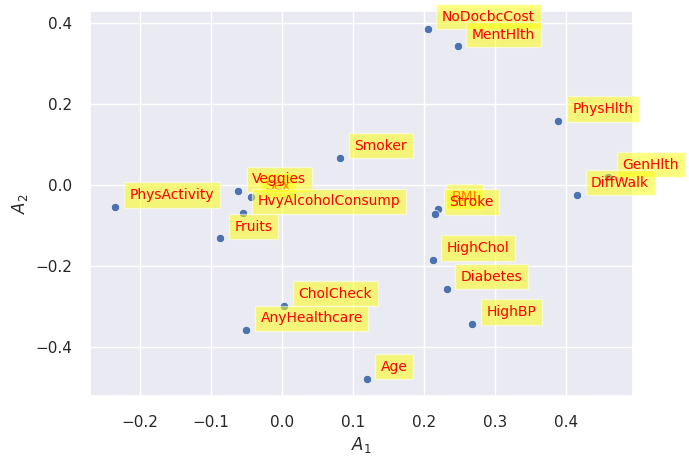

In [127]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

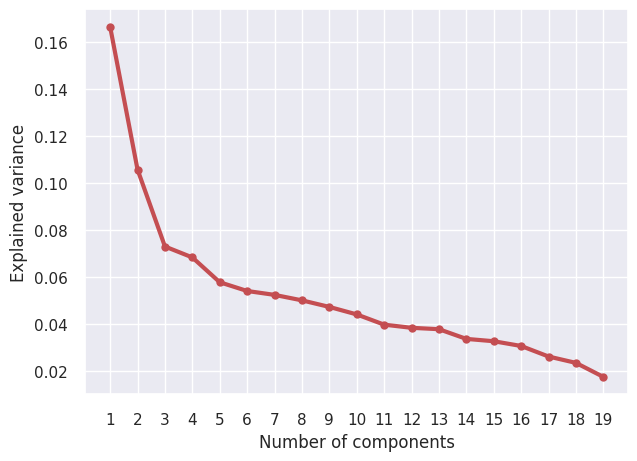

In [128]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

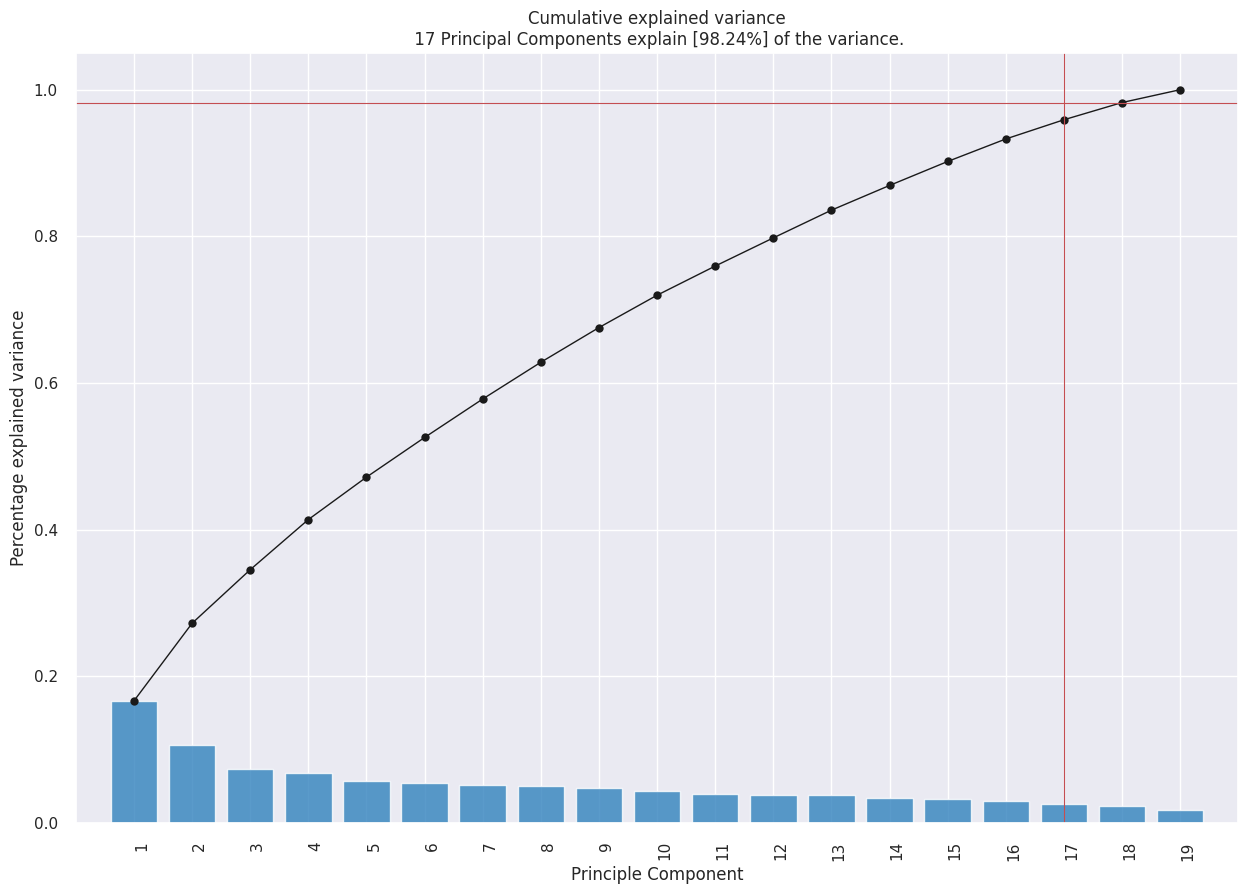

In [129]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '17 Principal Components explain [98.24%] of the variance'}, xlabel='PC1 (16.6% expl.var)', ylabel='PC2 (10.5% expl.var)'>)

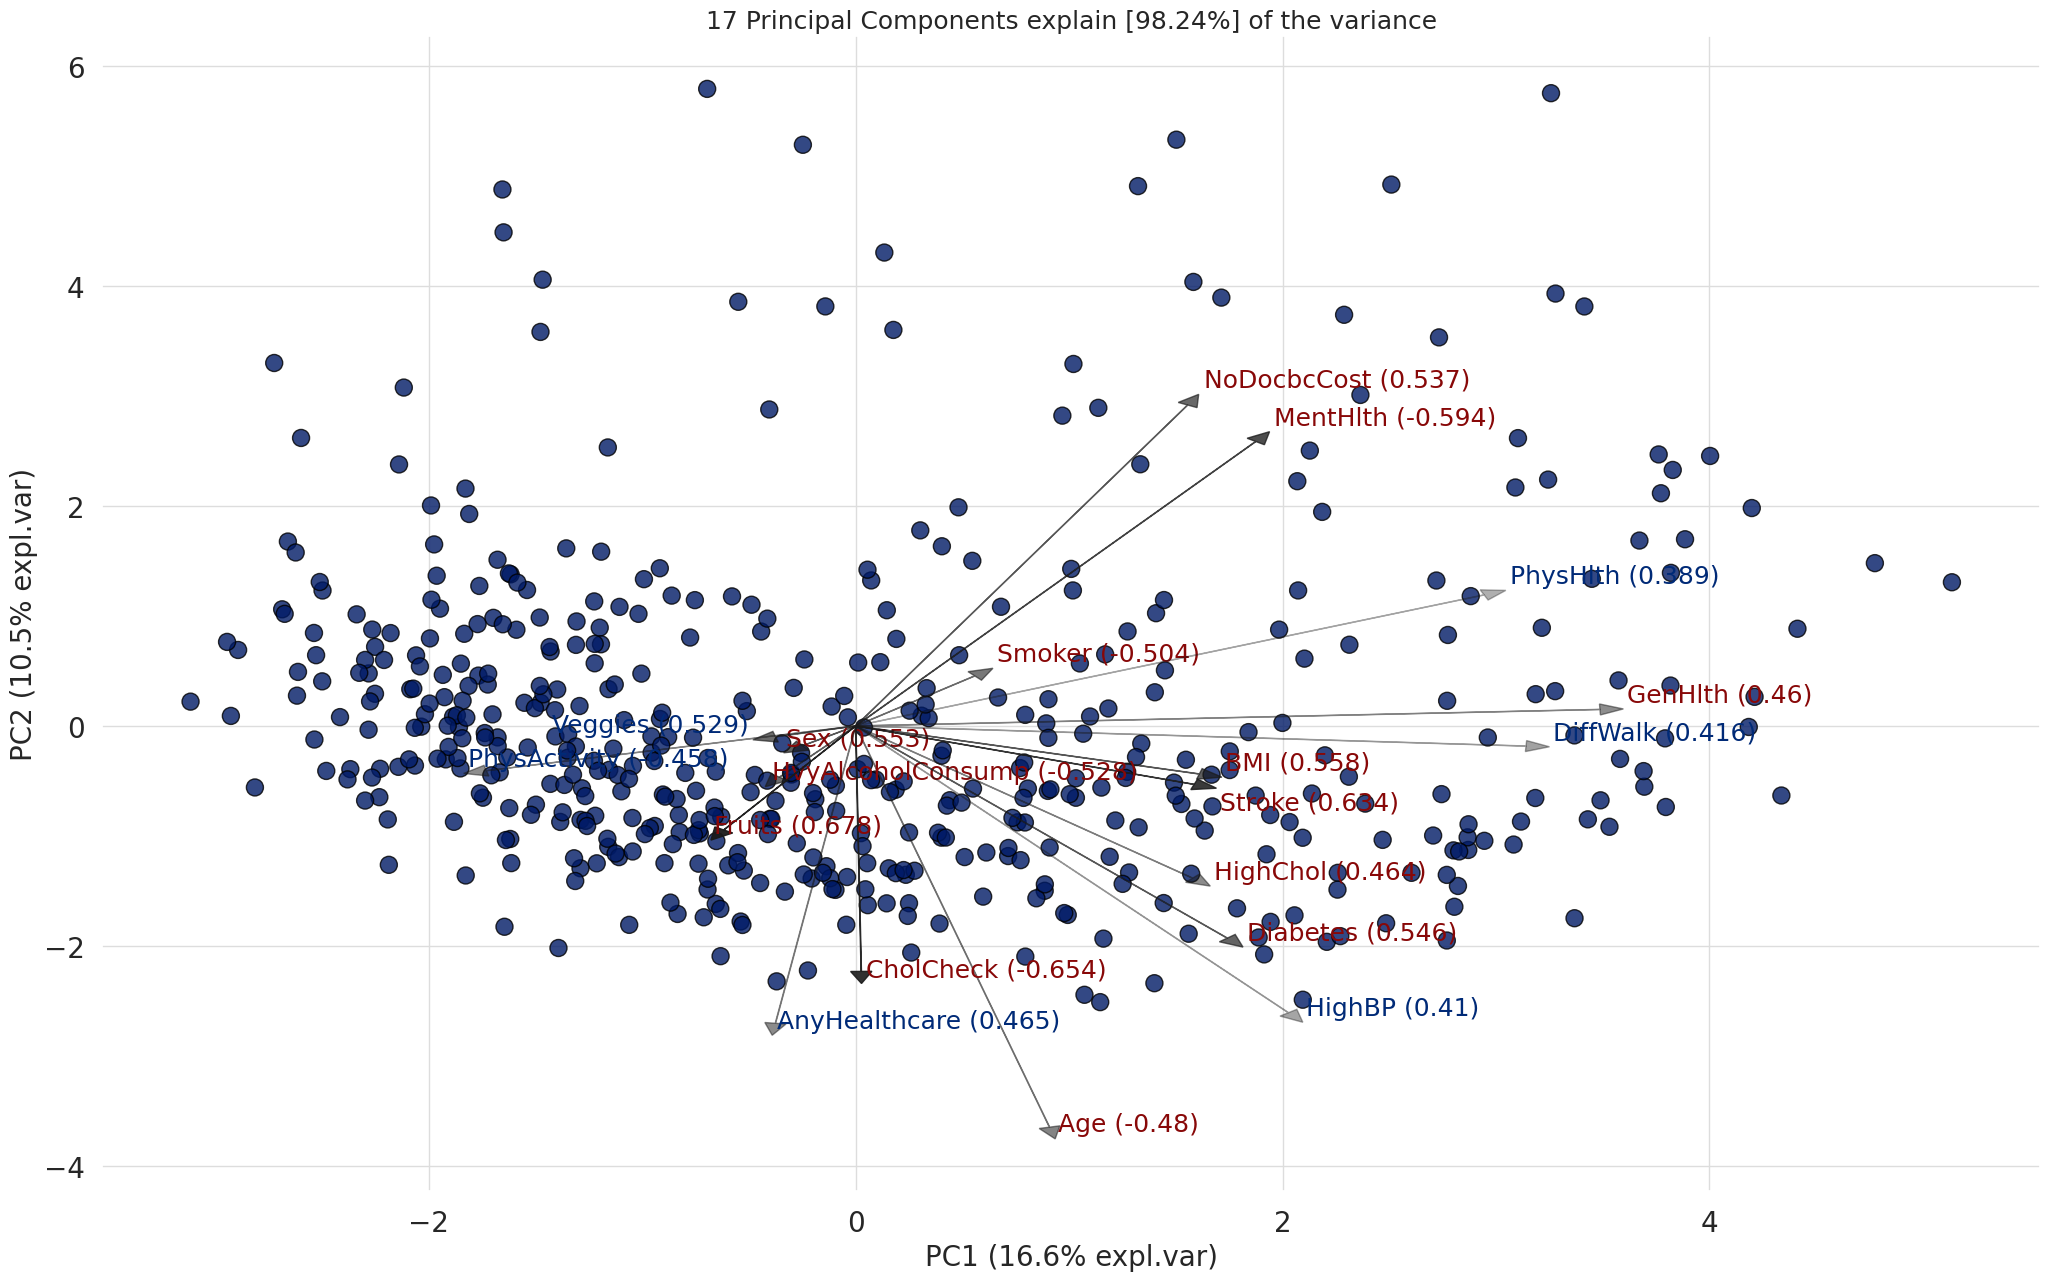

In [130]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '17 Principal Components explain [98.24%] of the variance'}, xlabel='PC1 (16.6% expl.var)', ylabel='PC2 (10.5% expl.var)', zlabel='PC3 (7.30% expl.var)'>)

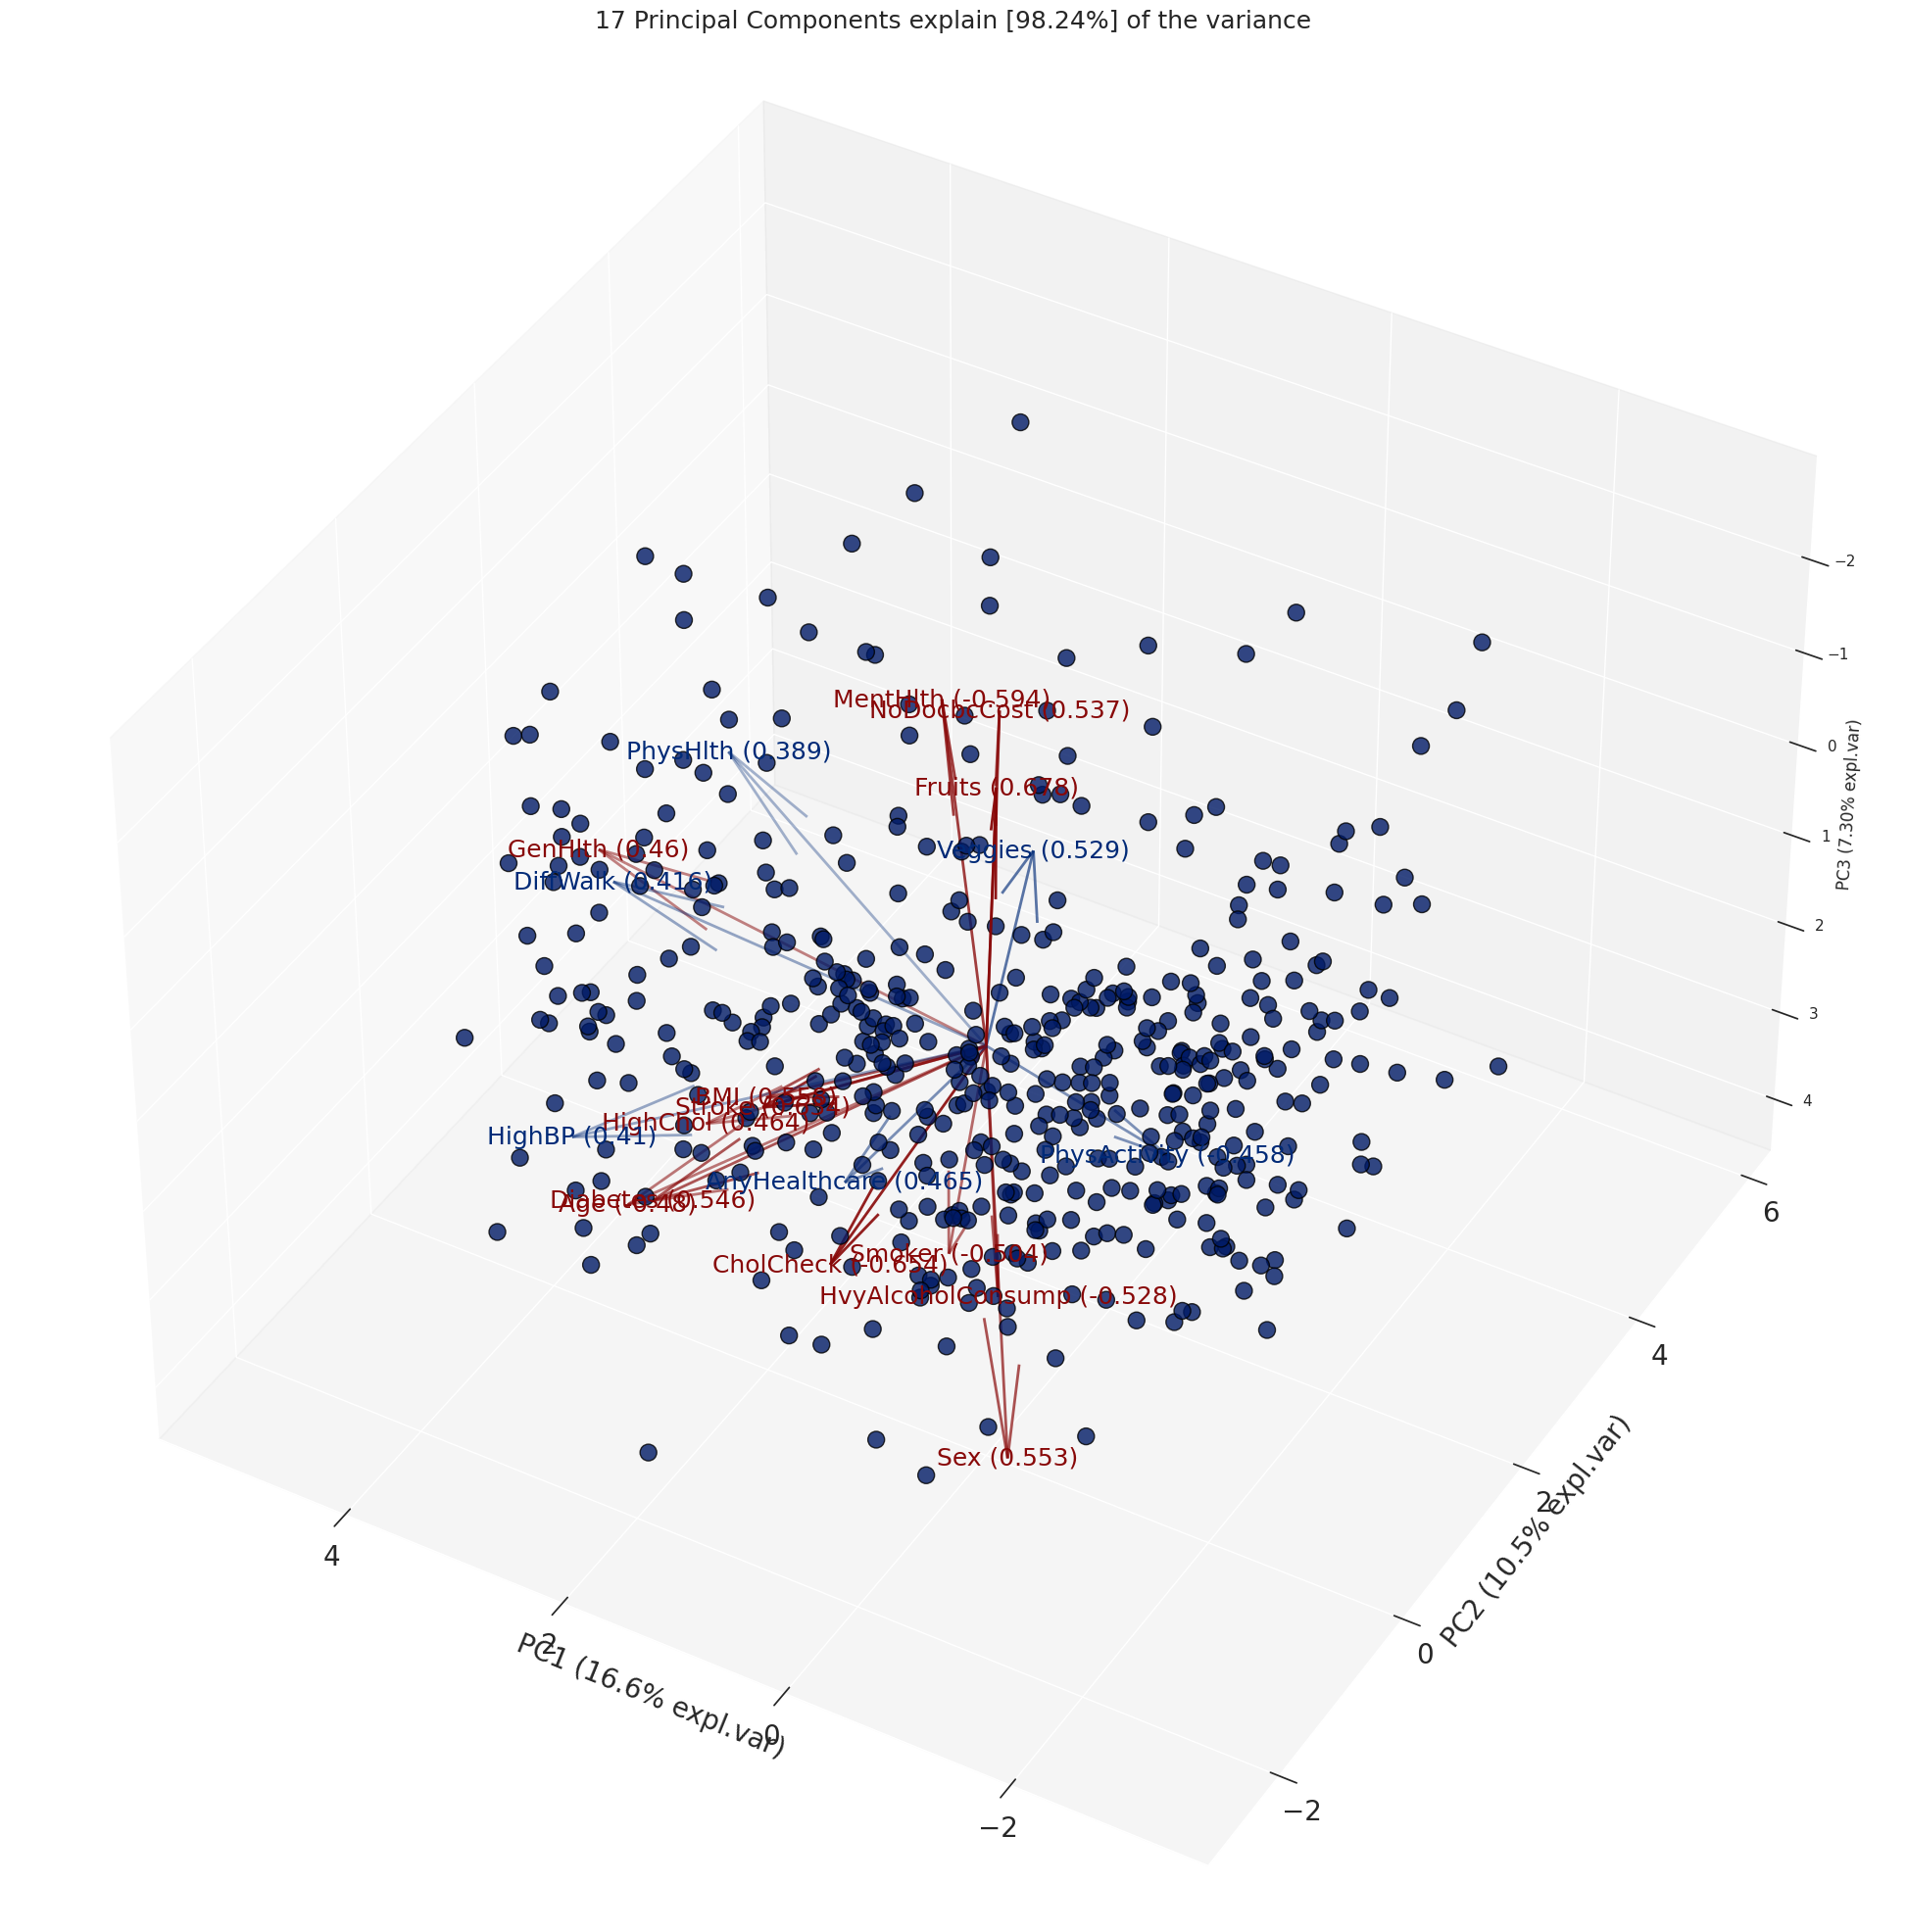

In [131]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [132]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [133]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (449, 20)
Unseen Data For Predictions: (50, 20)


In [134]:
from pycaret.classification import *
clf = setup(data=data, target='HeartDiseaseorAttack', train_size=0.7, session_id=123)

**Comparing All Models**

In [135]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [136]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

 Create a Model

**Logistic Regresssion**

In [142]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [143]:
tuned_rf=tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [144]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate Logistic Regression**


In [145]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [146]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [147]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [148]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [149]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [150]:
dummy=create_model('dummy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [151]:
tuned_dummy=tune_model(dummy)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate QDA Model**

In [152]:
tuned_dummy

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [153]:
evaluate_model(tuned_dummy)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [154]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [156]:
clf_pca = setup(data=data, target='HeartDiseaseorAttack', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [157]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [158]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

# **Tune Best Model**

In [159]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [160]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [162]:
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [163]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [164]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [165]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-nearest neighbour Model**

In [166]:
dummy_pca = create_model('dummy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [167]:
tuned_dummy_pca = tune_model(dummy_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [168]:
tuned_dummy_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

# **Evaluate Model KNN**

In [172]:
evaluate_model(tuned_dummy_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [173]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [174]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [175]:
tuned_lr_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [177]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [178]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [179]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=2, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=10, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [180]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [181]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.6 MB/s eta 0:00:00


In [182]:
import shap

In [183]:
interpret_model(tuned_et_pca, plot='summary')


ModuleNotFoundError: ignored

In [184]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

ModuleNotFoundError: ignored

In [185]:
interpret_model(tuned_et_pca, plot='reason')

ModuleNotFoundError: ignored